# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [127]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [128]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

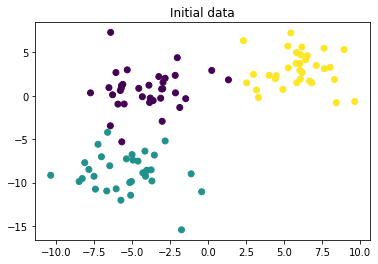

In [129]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [130]:
import random
import numpy as np
from collections import Counter

In [131]:
def distance(a, b):
    return ((a[0] - b[0])**2 + (a[1] - b[1])**2)**(0.5)

In [132]:
def funct_kNN(x_train, y_train, x_test, k): #x_test = y_test
    y_test = []
    for testP in x_test:
        dist = []
        for i in range(len(x_train)):
            dist.append((distance(testP, x_train[i]), y_train[i]))
        
        dist.sort()
        k_dist = dist[:k]
 
        k_classes = []
        for i in k_dist: k_classes.append(i[1])

        common_classes = Counter(k_classes).most_common()

        if len(common_classes) == 1:
            common_classes.append(('', ''))
            common_classes.append(('', ''))

        if (k == 3 or k == 9) and common_classes[0][1] == common_classes[1][1] == common_classes[2][1]:
            y_test.append(common_classes[np.random.randint(3)][0])    
        elif k > 3 and common_classes[0][1] == common_classes[1][1]:
            y_test.append(common_classes[np.random.randint(2)][0])
        else:
            y_test.append(common_classes[0][0])
        
        #y_test.append(common_classes[0][0])

    return y_test 

In [140]:
#funct_kNN(X[0:25], Y[0:25], X[25:100], 3)

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [134]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [135]:
x_tr, x_te, y_tr, y_te = train_test_split(X, Y)#, train_size = 0.5)

for k in [1, 3, 5, 7, 9]:
    y_pred = funct_kNN(x_tr, y_tr, x_te, k)
    print('k = ' + str(k) + ' accuracy score = ' + str(accuracy_score(y_te, y_pred)))

k = 1 accuracy score = 0.96
k = 3 accuracy score = 0.96
k = 5 accuracy score = 1.0
k = 7 accuracy score = 1.0
k = 9 accuracy score = 1.0


Постройте разделающие поверхности, которые строит классификатор

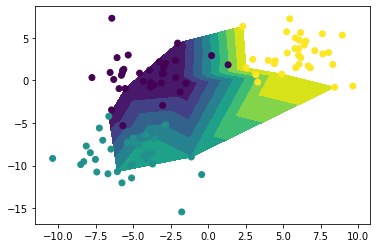

In [136]:
y = funct_kNN(x_tr, y_tr, x_te, 3)
plt.tricontourf(x_te[:,0], x_te[:,1], y)
plt.scatter(X[:,0], X[:,1], c = Y)

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [137]:
def funct_kNN_reg(x_train, y_train, x_test, k):
    y_reg_test = []
    
    for testP in x_test:
        dist = []
        for i in range(len(x_train)):
            dist.append(((abs(testP-x_train[i])), y_train[i]))

        dist.sort()
        k_dist = dist[:k]

        k_classes = [tmp[1] for tmp in k_dist]
        y_reg_test.append(np.mean(k_classes))
        
    return y_reg_test

In [138]:
from math import sin
from sklearn.metrics import mean_absolute_error

X = np.linspace(0.0, 5.0, num = 1000)
Y = [sin(i) for i in X]

#Y = []
#for i in range(len(X)):
#    Y[i] = sin(i) 

x_tr, x_te, y_tr, y_te = train_test_split(X, Y, train_size=0.01)

for k in [1, 3, 5, 7, 9]:
    y_reg = funct_kNN_reg(x_tr, y_tr, x_te, k)
    print('k = ' + str(k) + ' mean absolute error = ' + str(mean_absolute_error(y_te, y_reg)))

k = 1 mean absolute error = 0.13058437889612454
k = 3 mean absolute error = 0.21245910696309853
k = 5 mean absolute error = 0.36043564838957753
k = 7 mean absolute error = 0.4785962686100756
k = 9 mean absolute error = 0.5644800047510858


Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

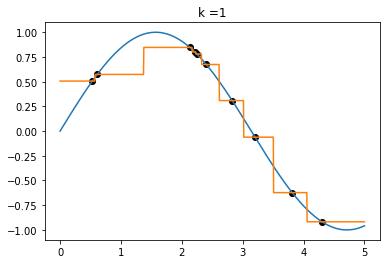

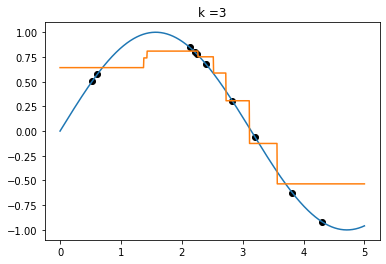

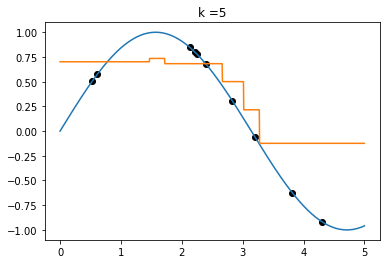

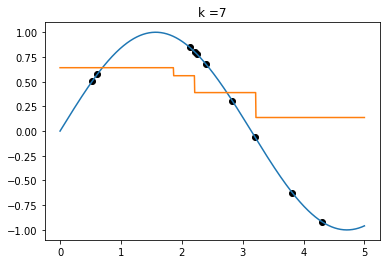

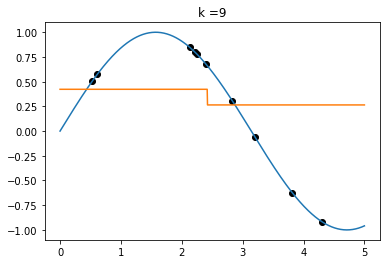

In [139]:
for k in [1, 3, 5, 7, 9]:
    y_reg = funct_kNN_reg(x_tr, y_tr, X, k)
    plt.scatter(x_tr, y_tr, c = 'black')
    plt.plot(X, Y)
    plt.plot(X, y_reg)
    plt.title('k =' + str(k))
    plt.show()